# Колесо отсева 

In [1]:
import random

def resampling_wheel(weights, N, particleList):
    new_particles = []
    index = int(random.randint(0, N))
    beta = 0.0
    max_weight = max(weights)
    for i in range(N):
        beta += random.uniform(0, 2.0 * max_weight)
        while beta > weights[index]:
            beta -= weights[index]
            index = (index + 1) % N
        new_particles.append(particleList[index])
        print(new_particles)
    particleList = new_particles
                

In [2]:
weights      = [0.12, 0.16, 0.14, 0.1, 0.1, 0.38]
particleList = ['particle_1', 'particle_2', 'particle_3', 'particle_4', 'particle_5', 'particle_6']

In [3]:
resampling_wheel(weights, 6, particleList)

['particle_1']
['particle_1', 'particle_1']
['particle_1', 'particle_1', 'particle_6']
['particle_1', 'particle_1', 'particle_6', 'particle_6']
['particle_1', 'particle_1', 'particle_6', 'particle_6', 'particle_1']
['particle_1', 'particle_1', 'particle_6', 'particle_6', 'particle_1', 'particle_4']


# Фильтр частиц

In [4]:
import sys
import json
import math

sys.path.append("../localization/")

from ParticleFilter import ParticleFilter
from robot import Robot
from field import Field

with open("../localization/landmarks.json", "r") as f:
            landmarks = json.loads(f.read())
from pf_visualization import visualization

In [5]:
pf = ParticleFilter(Robot(0.0, 0.0, 0.0), Field("../localization/parfield.json"), landmarks, n = 500, apr = True)

In [6]:
shift = {'shift_x':1.0, 'shift_y':0.01, 'shift_yaw':0}
observations = {"yellow_posts":[[4.3, -0.9],[4.2, 1.1]], "blue_posts":[]}

In [7]:
pf.particles_move(shift)

In [8]:
pf.resampling(observations)

In [9]:
pf.fall_reset(observations)

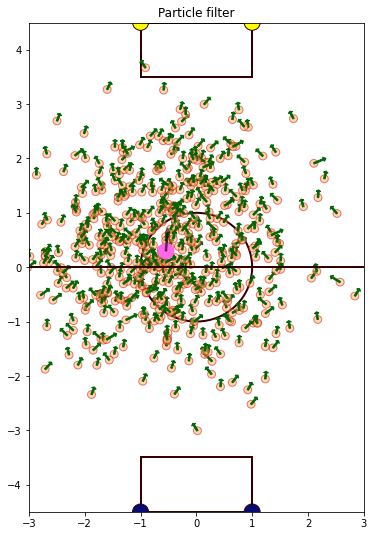

In [10]:
visualization(pf.myrobot, pf.p, factor = 7)